**CS549 - Machine Learning**
<br>


Title: **Seminar 1: Linear Regression**
<br>
Speaker: **Dr. Shota Tsiskaridze**

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

<h2 align="center">Appendix A</h2>

In [2]:
# Lets first import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import animation, rc
from IPython.display import HTML

<h3 align="center">Bias and Variance of an Estimator</h3>


-  **Bias** of an estimator is the **expected difference** between its **estimates** and the **true values** in the data:

$$\operatorname{Bias}(\hat{f}(x_0))=f(x_0)-\mathbf{E}\left [\hat{f}(x_0) \right ]$$

 - **Variance** of an estimator is defined as the **expected value** of the **squared difference** between the **estimate** of a model and the **expected value** of the **estimate**:

$$\operatorname{Var}(\hat{f}(x_0))=\mathbf{E}\left [ \left(\hat{f}(x_0)-\mathbf{E} \left[\hat{f}(x_0)\right] \right)^2 \right]$$

<h3 align="center">Bias–Variance Decomposition</h3>

- **Total expected error** a point $x_0$ is defined as follows:

$$\mathbf{E} \left [ \left ( f(x_0) - \hat{f}(x_0)\right )^2\right ].$$

- **Whichever model**  $\hat{f}$ we choose, its expected error can be further **decomposed** as:

$$\mathbf{E} \left [\left(f(x_0) - \hat{f}(x_0)\right)^2\right]
= \left(\operatorname{Bias}\left[\hat{f}(x_0)\right] \right) ^2 + \operatorname{Var}\left[\hat{f}(x_0)\right] + \sigma^2,$$

&emsp; &emsp; &ensp;where $\sigma^2$ is an **irreducible error** which we can't get rid off.

- **Estimating expected error** is, in some sense, a **good way** to estimate model's **generalization ability**.


- Let's firts **write a methods** that **generates** the dataset, **fits** it and returs the **true and predicted values**.

In [3]:
def generate_dataset(a, b, M, e_mean, e_var):

    # define true function
    f = lambda x:  np.sin(2*np.pi*x)

    # generate the dataset
    X = np.linspace(a, b, num=M)
    y_true = [f(i) for i in X]

    # generate the normally distributed noise
    e = np.random.normal(e_mean, e_var, size=M)
    
    # create true observations by adding noise
    y_obs = y_true + e
    
    return np.array(X), np.array(y_true), np.array(y_obs), np.array(e)

In [4]:
def fit_and_predict(a, b, M, e_mean, e_var, x0, degree):

    # generate the dataset
    X, y_true, y_obs, e = generate_dataset(a, b, M, e_mean, e_var)
    
    poly = PolynomialFeatures(degree, include_bias=True)
    
    # augmenting training data with polynomial features
    X_dummy = poly.fit_transform(X.reshape(-1, 1))

    model = LinearRegression(fit_intercept=False) 

    model.fit(X_dummy, y_obs) # fitting the model using OLS
    
    return f(x0), model.predict(poly.fit_transform([[x0]]))[0]

- Let's for a given **single data point** $x_0$ calculate the following parameters using the **different number of degrees** of freedomg of our **polinomial function**:
 - **True Value** 
 - **Predicted Value**
 - **Bias**
 - **Variance**

In other words, you need to:

- select the data point on which we will measure prediction quality and fluctuations:  `x0 = 0.25`
- select the number of degree of freedom of the polynomial function:`degree = 1` and `degree = 10`
- train model on different datasets: `N = 10`
- save all the predicted values in an array: `y1_preds` and `y10_preds`
- get the **True Value**: `true_val`
- get the **Average Estimate**: `mean_val`
- get the **Bias**: `bias`
- get the **Variance**: `variance`
- fill the code below and plot the distributions

In [5]:
f = lambda x:  np.sin(2*np.pi*x)

# set up the parameters
a = 0
b = 1
M = 10
e_mean = 0
e_var = 0.1

# we need to fix data point on which we will measure prediction quality and fluctuations
x0 = 0.25

In [6]:
# set up the number of degree of the polinomial function
degree = 1

# delcare the predictions array
y_preds = []

# calculate predictions for 1000 datasets   
for _ in range(1000):
    y_true, y_pred = fit_and_predict(a, b, M, e_mean, e_var, x0, degree)
    y_preds.append(y_pred)

y1_preds = y_preds
    
print('True Value: ', y_true)
print('Average Estimate: ', np.mean(y_pred))
print('Bias: ', y_true - np.mean(y_pred))
print('Variance: ', np.mean((y_preds - np.mean(y_pred))**2))

True Value:  1.0
Average Estimate:  0.3188439588717992
Bias:  0.6811560411282007
Variance:  0.0020028371873544587


In [7]:
# set up the number of degree of the polinomial function
degree = 10

# delcare the predictions array
y_preds = []

# calculate predictions for 1000 datasets   
for _ in range(1000):
    y_true, y_pred = fit_and_predict(a, b, M, e_mean, e_var, x0, degree)
    y_preds.append(y_pred)

y10_preds = y_preds
    
print('True Value: ', y_true)
print('Average Estimate: ', np.mean(y_pred))
print('Bias: ', y_true - np.mean(y_pred))
print('Variance: ', np.mean((y_preds - np.mean(y_pred))**2))

True Value:  1.0
Average Estimate:  1.1050615070387684
Bias:  -0.10506150703876838
Variance:  0.019751900812830854


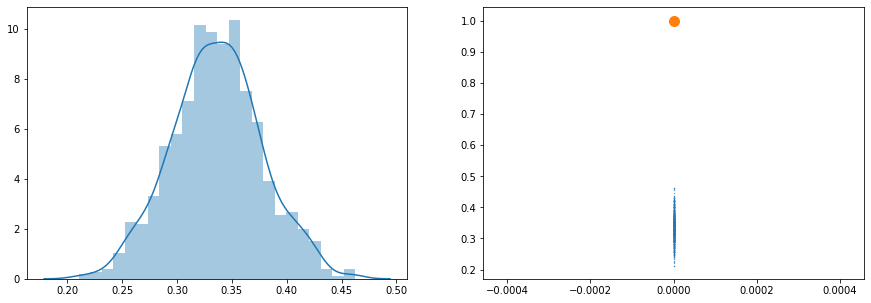

In [8]:
# plot the distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(y1_preds, ax=ax[0])
ax[1].scatter([0]*len(y1_preds), y1_preds, s=0.1)
ax[1].scatter([0], [y_true], s=100)

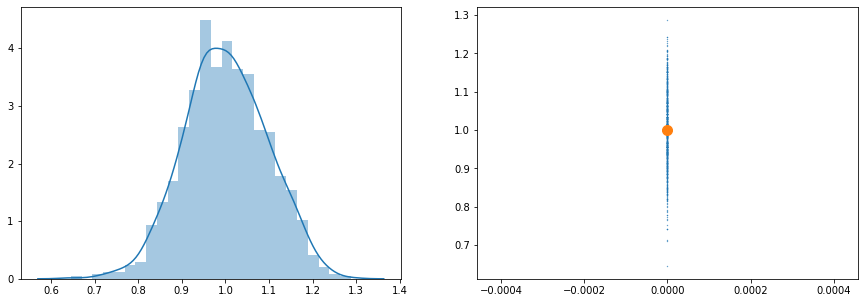

In [9]:
# plot the distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.distplot(y10_preds, ax=ax[0])
ax[1].scatter([0]*len(y10_preds), y10_preds, s=0.1)
ax[1].scatter([0], [y_true], s=100)

**Excersice**. Explain the both observations!


<h3 align="center">Regularization</h3>

- **Regularization** is a technique used to **address overfitting**;

- **Regularization**, significantly **reduces the variance** of the model, **without** substantial **increase in its bias**.

- **Main idea** of regularization is to **keep all the features**, but **reduce magnitude of parameters** $\boldsymbol{\theta}$;


- A **regularization term** (or **regularizer**) $R(f)$ is added to a **loss function**:

  $$J_{reg}(\boldsymbol{\theta}) = J(\boldsymbol{\theta}) + R(f).$$


- Mainly, there are two types of forms of regularization:

  - **Ridge regularization**, or **Tikhonov regularization**, uses he $L_2$ **norm** of the vector $\boldsymbol{\theta}$:

    $$R(f) = \lambda \cdot \| \boldsymbol{\theta} \|^2_2 = \lambda \cdot \boldsymbol{\theta}^T\boldsymbol{\theta} = \lambda \cdot \sum_{i=1}^n \theta_i^2$$
  
  - **Lasso regularization** uses he $L_1$ **norm** of the vector $\boldsymbol{\theta}$:

    $$R(f) = \lambda \cdot \| \boldsymbol{\theta} \|_1 = \lambda \cdot \sum_{i=1}^n |\theta_i|$$

  - $\lambda$ is a **hyperparameter**, called **regularization parameter**.

- Let's add **regularization term** importing the **Ridge** and **Lasso** regressions from the **Scikit-Learn** library

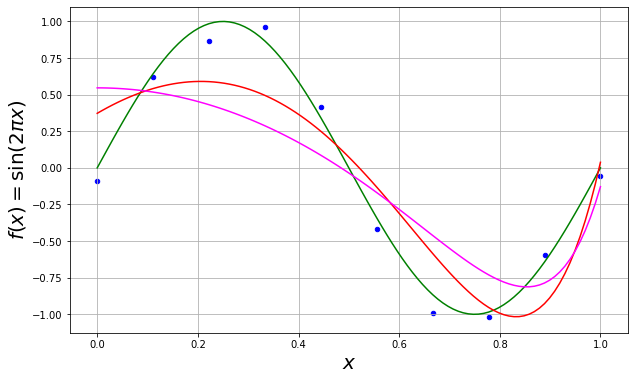

In [10]:
from sklearn.linear_model import Ridge, Lasso

f = lambda x:  np.sin(2*np.pi*x)

# set up the parameters
a = 0
b = 1
M = 10
e_mean = 0
e_var = 0.1

# set up the number of degree of the polinomial function
degree = 10

# define the learning rate alpha (or lambda)
alpha = 0.01


X, y_true, y_obs, e = generate_dataset(a, b, M, e_mean, e_var)
linspaceX = np.linspace(a, b, num=100)

# define linear regression model with regularization term
model_ridge = Ridge(alpha=alpha, fit_intercept=False) 
model_lasso = Lasso(alpha=alpha, fit_intercept=False) 

poly = PolynomialFeatures(degree=degree, include_bias=True)

X_dummy = poly.fit_transform(X.reshape(-1, 1))

# fit the model using Ordinary Least Square
model_ridge.fit(X_dummy, y_obs)
model_lasso.fit(X_dummy, y_obs)

yr_pred = model_ridge.predict(X_dummy)
yl_pred = model_lasso.predict(X_dummy)


poly_ridge = np.poly1d(model_ridge.coef_[::-1])
poly_lasso = np.poly1d(model_lasso.coef_[::-1])

fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y_obs, s=20, c="blue")
plt.plot   (linspaceX, f(linspaceX), 'g')
plt.plot   (linspaceX, poly_ridge(linspaceX), "r")
plt.plot   (linspaceX, poly_lasso(linspaceX), "magenta")

plt.xlabel ("$x$",   fontsize=20)
plt.ylabel ("$f(x)=\sin(2\pi x)$", fontsize=20)
plt.grid()

In [11]:
def generate_and_fit(a, b, M, e_mean, e_var, degree, alpha):

    X, y_true, y_obs, e = generate_dataset(a, b, M, e_mean, e_var)
    linspaceX = np.linspace(a, b, num=100)

    # define linear regression model with regularization term
    model_ridge = Ridge(alpha=alpha, fit_intercept=False) 
    model_lasso = Lasso(alpha=alpha, fit_intercept=False) 

    poly = PolynomialFeatures(degree=degree, include_bias=True)

    X_dummy = poly.fit_transform(X.reshape(-1, 1))

    # fit the model using Ordinary Least Square
    model_ridge.fit(X_dummy, y_obs)
    model_lasso.fit(X_dummy, y_obs)

    yr_pred = model_ridge.predict(X_dummy)
    yl_pred = model_lasso.predict(X_dummy)


    poly_ridge = np.poly1d(model_ridge.coef_[::-1])
    poly_lasso = np.poly1d(model_lasso.coef_[::-1])

    plt.scatter(X, y_obs, s=20, c="blue")
    plt.plot   (linspaceX, f(linspaceX), 'g')
    plt.plot   (linspaceX, poly_ridge(linspaceX), "r")
    plt.plot   (linspaceX, poly_lasso(linspaceX), "magenta")

    plt.xlabel ("$x$",   fontsize=20)
    plt.ylabel ("$f(x)=\sin(2\pi x)$", fontsize=20)
    plt.grid()    

D:\Work\MaxinAI\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011367024089437489, tolerance: 0.0004775651389117857
  positive)
D:\Work\MaxinAI\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.054375405474013164, tolerance: 0.00041045099813954744
  positive)
D:\Work\MaxinAI\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03755020765168512, tolerance: 0.00046731866668500976
  positive)
D:\Work\MaxinAI\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of

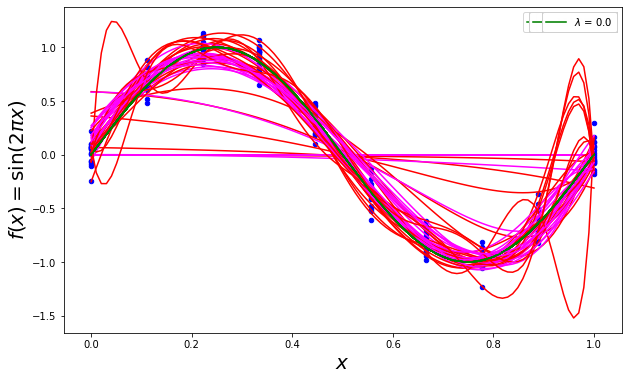

In [12]:
from celluloid import Camera

fig = plt.figure(figsize=(10, 6))

camera = Camera(fig)

for i in range(0, 20):
    alpha = 100 * 0.1**i
    generate_and_fit(a, b, M, e_mean, e_var, degree, alpha)
    t = plt.plot  (linspaceX, f(linspaceX), 'g')
    plt.legend(t, [f"$\lambda$ = {np.round(alpha, 10)}"])
    camera.snap()

In [13]:
# to run the animation in Google Colab use this code

from matplotlib import animation, rc
from IPython.display import HTML

animation = camera.animate(interval=500)
rc('animation', html='jshtml')
animation
animation.save('S1_Learning_Rate.gif')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


**Excersice**. Explain the both observations!
